In [1]:
with open('hCTD52.txt', 'r') as f:
  hctd52 = f.read()
print(hctd52)

In [2]:
hctd52 = hctd52.rstrip()

In [3]:
hctd_list = []
index = hctd52.index("Y", 1)
start = 0
while index>0:
    hctd_list.append(hctd52[start:index])
    start = index
#     print(index)
    index = hctd52.find("Y", index + 1)
hctd_list.append(hctd52[start:])
print(hctd_list)
    

In [4]:
# import csv
# with open("hctd52.csv", "w") as f:
#         writer = csv.writer(f, delimiter=',')
#         writer.writerow([1, 2, 3, 4, 5, 6, 7])
#         for i in hctd_list:
#             writer.writerow(i)

In [5]:
import pandas as pd
df = pd.DataFrame(list(i) for i in hctd_list)
df.to_csv("hctd52.csv", sep=',', index = False)

In [6]:
# df = pd.read_csv('hctd52.csv', error_bad_lines=False)
df2 = pd.read_csv('hctd52.csv')

In [7]:
df2.iloc[:,2]

0     P
1     P
2     P
3     P
4     P
5     P
6     P
7     P
8     P
9     P
10    P
11    P
12    P
13    P
14    P
15    P
16    P
17    P
18    P
19    P
20    P
21    P
22    P
23    P
24    P
25    P
26    P
27    P
28    P
29    P
30    P
31    P
32    P
33    P
34    P
35    P
36    P
37    P
38    P
39    P
40    P
41    P
42    P
43    P
44    P
45    P
46    P
47    P
48    P
49    P
50    P
51    L
Name: 2, dtype: object

In [39]:
import numpy as np
for i in np.arange(7):
    print(f"The amino acid composition at position {i+1} is:\n", df2.iloc[:,i].value_counts(), '\n')

The amino acid composition at position 1 is:
 Y    52
Name: 0, dtype: int64 

The amino acid composition at position 2 is:
 S    43
T     8
E     1
Name: 1, dtype: int64 

The amino acid composition at position 3 is:
 P    51
L     1
Name: 2, dtype: int64 

The amino acid composition at position 4 is:
 T    45
S     4
Q     2
R     1
Name: 3, dtype: int64 

The amino acid composition at position 5 is:
 S    51
T     1
Name: 4, dtype: int64 

The amino acid composition at position 6 is:
 P    52
Name: 5, dtype: int64 

The amino acid composition at position 7 is:
 S    26
K     8
T     6
N     5
G     2
A     2
R     1
V     1
E     1
Name: 6, dtype: int64 



In [9]:
def aa_counter(column_index):
    amino_acids = []
    percentages = []
    for amino_acid in df2.iloc[:,column_index].unique():
        amino_acids.append(amino_acid)
        aa_count = df2.iloc[:,column_index].str.count(amino_acid).sum()
        total = len(df2.iloc[:,column_index])
        percentage = aa_count/total*100
        percentages.append(percentage)
    return amino_acids, percentages


At position 1:
Y is: 100.0%

At position 2:
S is: 82.6923076923077%
E is: 1.9230769230769231%
T is: 15.384615384615385%

At position 3:
P is: 98.07692307692307%
L is: 1.9230769230769231%

At position 4:
T is: 86.53846153846155%
R is: 1.9230769230769231%
Q is: 3.8461538461538463%
S is: 7.6923076923076925%

At position 5:
S is: 98.07692307692307%
T is: 1.9230769230769231%

At position 6:
P is: 100.0%

At position 7:
A is: 3.8461538461538463%
G is: 3.8461538461538463%
S is: 50.0%
N is: 9.615384615384617%
R is: 1.9230769230769231%
T is: 11.538461538461538%
K is: 15.384615384615385%
E is: 1.9230769230769231%
V is: 1.9230769230769231%


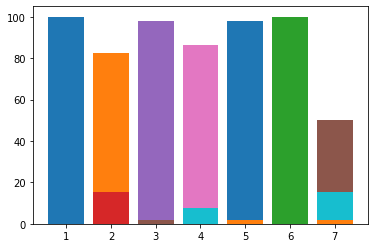

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in np.arange(7):
    amino_acids, percentages = aa_counter(i)    
    print(f"\nAt position {i+1}:")
    for amino_acid, percentage in zip(amino_acids, percentages):
        print(f"{amino_acid} is: {percentage}%")
        plt.bar(i+1, percentage)

In [34]:
from matplotlib.cm import get_cmap
colors = get_cmap('tab20').colors
# axes.set_prop_cycle(color=colors)
aa_colors = []
all_aa = list(set(hctd52))
for i, aa in enumerate(all_aa):
    print(i, aa)
    aa_colors.append(colors[i])
color_dict = {all_aa[i]: aa_colors[i] for i in range(len(all_aa))}
color_dict['Y'] = 'red'
color_dict['S'] = 'green'
color_dict['P'] = 'pink'
color_dict['T'] = 'blue'
color_dict

0 T
1 K
2 S
3 Y
4 Q
5 I
6 A
7 G
8 N
9 R
10 L
11 D
12 E
13 V
14 P


{'T': 'blue',
 'K': (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 'S': 'green',
 'Y': 'red',
 'Q': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 'I': (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 'A': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 'G': (1.0, 0.596078431372549, 0.5882352941176471),
 'N': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 'R': (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 'L': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 'D': (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 'E': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 'V': (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 'P': 'pink'}


At position 1:
Y is: 100.0%

At position 2:
S is: 82.6923076923077%
E is: 1.9230769230769231%
T is: 15.384615384615385%

At position 3:
P is: 98.07692307692307%
L is: 1.9230769230769231%

At position 4:
T is: 86.53846153846155%
R is: 1.9230769230769231%
Q is: 3.8461538461538463%
S is: 7.6923076923076925%

At position 5:
S is: 98.07692307692307%
T is: 1.9230769230769231%

At position 6:
P is: 100.0%

At position 7:
A is: 3.8461538461538463%
G is: 3.8461538461538463%
S is: 50.0%
N is: 9.615384615384617%
R is: 1.9230769230769231%
T is: 11.538461538461538%
K is: 15.384615384615385%
E is: 1.9230769230769231%
V is: 1.9230769230769231%


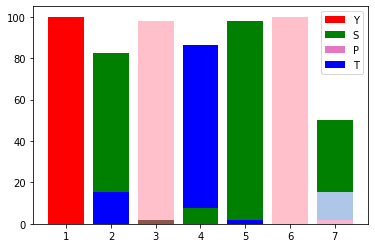

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
for i in np.arange(7):
    amino_acids, percentages = aa_counter(i)    
    print(f"\nAt position {i+1}:")
    for amino_acid, percentage in zip(amino_acids, percentages):
        print(f"{amino_acid} is: {percentage}%")
        ax.bar(i+1, percentage, color = color_dict[amino_acid], label = amino_acid)
# leg_dict = {k: color_dict[k] for k in ('Y','S','P','T')}
leg_dict = {"Y":'red', "S":'green', "P":'pink', "T":'blue'}
plt.legend(leg_dict)
plt.show()